<font color = green >

# <center>Homework<center>
</font>

__Exploratory Data Analysis (EDA)__ of car insurance dataset.
    
__Dataset description:__ Car insurance claim. As you are working in the insurance company. Company wants to know the reason why claim was not made. Doing so would allow insurance company to improve there policy for giving loan to the customer. In this project you are dealing with various feature such as age, occupation etc. based on that let's get back to the final conculsion.    

__Steps:__
- Data Cleaning
- Descriptive Statistics
- Data Visualization
- Conclusions

In [ ]:
pip install plotly

In [60]:
import pandas as pd
cic = pd.read_csv("Car_Insurance_Claim.csv")
cic.head()

,Unnamed: 0,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0,569520,65+,female,majority,0-9y,high school,upper class,0.629027313918201,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,1,750365,16-25,male,majority,0-9y,none,poverty,0.3577571170184627,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,2,199901,16-25,female,majority,0-9y,high school,working class,0.4931457852181982,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,3,478866,16-25,male,majority,0-9y,university,working class,0.2060128507324556,1.0,before 2015,0.0,none,32765,11000.0,sedan,0,0,0,0.0
4,4,731664,26-39,male,majority,10-19y,none,working class,0.3883658881572184,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0


In [61]:
cic.shape

(10000, 20)

## Data Cleaning

First, let's check the column data types to see if any should be converted to numeric.

In [62]:
cic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           10000 non-null  int64 
 1   ID                   10000 non-null  int64 
 2   AGE                  9950 non-null   object
 3   GENDER               9950 non-null   object
 4   RACE                 9951 non-null   object
 5   DRIVING_EXPERIENCE   9950 non-null   object
 6   EDUCATION            9951 non-null   object
 7   INCOME               10000 non-null  object
 8   CREDIT_SCORE         8978 non-null   object
 9   VEHICLE_OWNERSHIP    9950 non-null   object
 10  VEHICLE_YEAR         9950 non-null   object
 11  MARRIED              9952 non-null   object
 12  CHILDREN             9950 non-null   object
 13  POSTAL_CODE          9950 non-null   object
 14  ANNUAL_MILEAGE       9000 non-null   object
 15  VEHICLE_TYPE         9951 non-null   object
 16  SPEED

We can see that all useful columns are of type `object`. But if we check the head of the `cic` DataFrame (as we did earlier), we can notice that at least the `CREDIT_SCORE` and `ANNUAL_MILEAGE` columns should be numeric, but they are not. So we can conclude that these columns contain non-numeric values.

In [63]:
print(cic.loc[pd.to_numeric(cic['CREDIT_SCORE'], errors='coerce').isna(), "CREDIT_SCORE"].value_counts())
print(cic.loc[pd.to_numeric(cic['ANNUAL_MILEAGE'], errors='coerce').isna(), "ANNUAL_MILEAGE"].value_counts())

CREDIT_SCORE
none    50
Name: count, dtype: int64
ANNUAL_MILEAGE
none    50
Name: count, dtype: int64


The only non-numeric value in both columns was `none`. There were not many of them compared to the total dataset size (10,000 rows), and this value likely just indicates missing data. Therefore, I replaced it with `NaN`.

In [64]:
cic[['CREDIT_SCORE', 'ANNUAL_MILEAGE']] = cic[['CREDIT_SCORE', 'ANNUAL_MILEAGE']].apply(pd.to_numeric, errors='coerce')

cic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10000 non-null  int64  
 1   ID                   10000 non-null  int64  
 2   AGE                  9950 non-null   object 
 3   GENDER               9950 non-null   object 
 4   RACE                 9951 non-null   object 
 5   DRIVING_EXPERIENCE   9950 non-null   object 
 6   EDUCATION            9951 non-null   object 
 7   INCOME               10000 non-null  object 
 8   CREDIT_SCORE         8928 non-null   float64
 9   VEHICLE_OWNERSHIP    9950 non-null   object 
 10  VEHICLE_YEAR         9950 non-null   object 
 11  MARRIED              9952 non-null   object 
 12  CHILDREN             9950 non-null   object 
 13  POSTAL_CODE          9950 non-null   object 
 14  ANNUAL_MILEAGE       8950 non-null   float64
 15  VEHICLE_TYPE         9951 non-null   

Now the `CREDIT_SCORE` and `ANNUAL_MILEAGE` columns are numeric.

Let's verify whether the values in these columns fall within a realistic range.

In [65]:
cic['CREDIT_SCORE'].describe()

count    8928.000000
mean        0.515816
std         0.137568
min         0.053358
25%         0.417383
50%         0.524905
75%         0.618289
max         0.960819
Name: CREDIT_SCORE, dtype: float64

All credit score values are distributed between 0 and 1, with a median of 0.5. This seems realistic.

In [66]:
cic['ANNUAL_MILEAGE'].describe()

count     8950.000000
mean     11698.435754
std       2820.496277
min       2000.000000
25%      10000.000000
50%      12000.000000
75%      14000.000000
max      22000.000000
Name: ANNUAL_MILEAGE, dtype: float64

This distribution looks reasonable and consistent with typical driving distances.

Now let's check the values in the categorical columns. First, let's take a look at their unique entries.

In [67]:
for column in cic.select_dtypes(include='object').columns:
    print(f'{column} ',cic[column].unique())

AGE  ['65+' '16-25' '26-39' '40-64' 'none' nan]
GENDER  ['female' 'male' 'none' nan]
RACE  ['majority' 'minority' nan 'none']
DRIVING_EXPERIENCE  ['0-9y' '10-19y' '20-29y' '30y+' nan 'none']
EDUCATION  ['high school' 'none' 'university' nan]
INCOME  ['upper class' 'poverty' 'working class' 'middle class']
VEHICLE_OWNERSHIP  ['1.0' '0.0' 'none' nan]
VEHICLE_YEAR  ['after 2015' 'before 2015' nan 'none']
MARRIED  ['0.0' '1.0' nan 'none']
CHILDREN  ['1.0' '0.0' 'none' nan]
POSTAL_CODE  ['10238' '32765' '32765.0' '10238.0' '92101' '21217' '92101.0' '21217.0'
 nan 'none']
VEHICLE_TYPE  ['sedan' 'sports car' 'none' nan]
SPEEDING_VIOLATIONS  ['0' '2' '3' '7' '6' '4' '10' '13' '1' '5' '9' '8' '12' nan 'none' '11'
 '15' '17' '19' '18' '16' '14' '22']
DUIS  ['0' '2' '1' nan 'none' '3' '4' '5' '6']
PAST_ACCIDENTS  ['0' '1' '3' '7' '2' '5' '4' nan '6' '8' '10' 'none' '11' '9' '12' '14'
 '15']
OUTCOME  ['0.0' '1.0' 'none' nan]


In the `POSTAL_CODE` column, some values are duplicated due to formatting differences, such as `10238` and `10238.0`.

In [68]:
cic['POSTAL_CODE'] = cic['POSTAL_CODE'].str.replace('.0','')
cic['POSTAL_CODE'].unique()

array(['10238', '32765', '92101', '21217', nan, 'none'], dtype=object)

Now all values in the columns look okay, but we can see that almost every categorical column contains the value `none`. For all of them except `EDUCATION`, I assume this represents missing data. For example, in the `CHILDREN` column, a value of `0.0` means the client has no children, so `none` likely means something different, probably absence of data. However, for `EDUCATION`, it’s more complex, as `none` may actually indicate that the person has no formal or incomplete education.

To clarify the situation, we can check how many `none` values each column contains and compare them to the number in the `EDUCATION` column.

In [69]:
(cic == 'none').sum()

Unnamed: 0                0
ID                        0
AGE                      50
GENDER                   49
RACE                     50
DRIVING_EXPERIENCE       50
EDUCATION              1947
INCOME                    0
CREDIT_SCORE              0
VEHICLE_OWNERSHIP        50
VEHICLE_YEAR             50
MARRIED                  50
CHILDREN                 50
POSTAL_CODE              50
ANNUAL_MILEAGE            0
VEHICLE_TYPE             50
SPEEDING_VIOLATIONS      49
DUIS                     50
PAST_ACCIDENTS           50
OUTCOME                  50
dtype: int64

As we can see, all columns have about 49-50 `none` values (`CREDIT_SCORE` and `ANNUAL_MILEAGE` had 50 as well), but `EDUCATION` has significantly more. I understand that some of these `none` values might indicate missing data rather than a specific type of education. However, I will assume that these `none` values in `EDUCATION` indicate no formal or completed education, since the number of `none` values indicating missing data is likely similar across all columns. Even if some of these `none` values actually represent missing data rather than type of education, this assumption will not significantly affect the analysis.

Since I assume that the `none` values simply indicate missing data, I replace them with `NaN` to make the data easier to work with.

In [70]:
import numpy as np

cic[cic.columns.difference(['EDUCATION'])] = cic[cic.columns.difference(['EDUCATION'])].replace('none', np.nan)
cic.isna().sum()

Unnamed: 0                0
ID                        0
AGE                     100
GENDER                   99
RACE                     99
DRIVING_EXPERIENCE      100
EDUCATION                49
INCOME                    0
CREDIT_SCORE           1072
VEHICLE_OWNERSHIP       100
VEHICLE_YEAR            100
MARRIED                  98
CHILDREN                100
POSTAL_CODE             100
ANNUAL_MILEAGE         1050
VEHICLE_TYPE             99
SPEEDING_VIOLATIONS      99
DUIS                    100
PAST_ACCIDENTS          100
OUTCOME                 100
dtype: int64

We can see that all categorical columns have around 99–100 missing values. It's likely the same rows across columns. Let's check that.

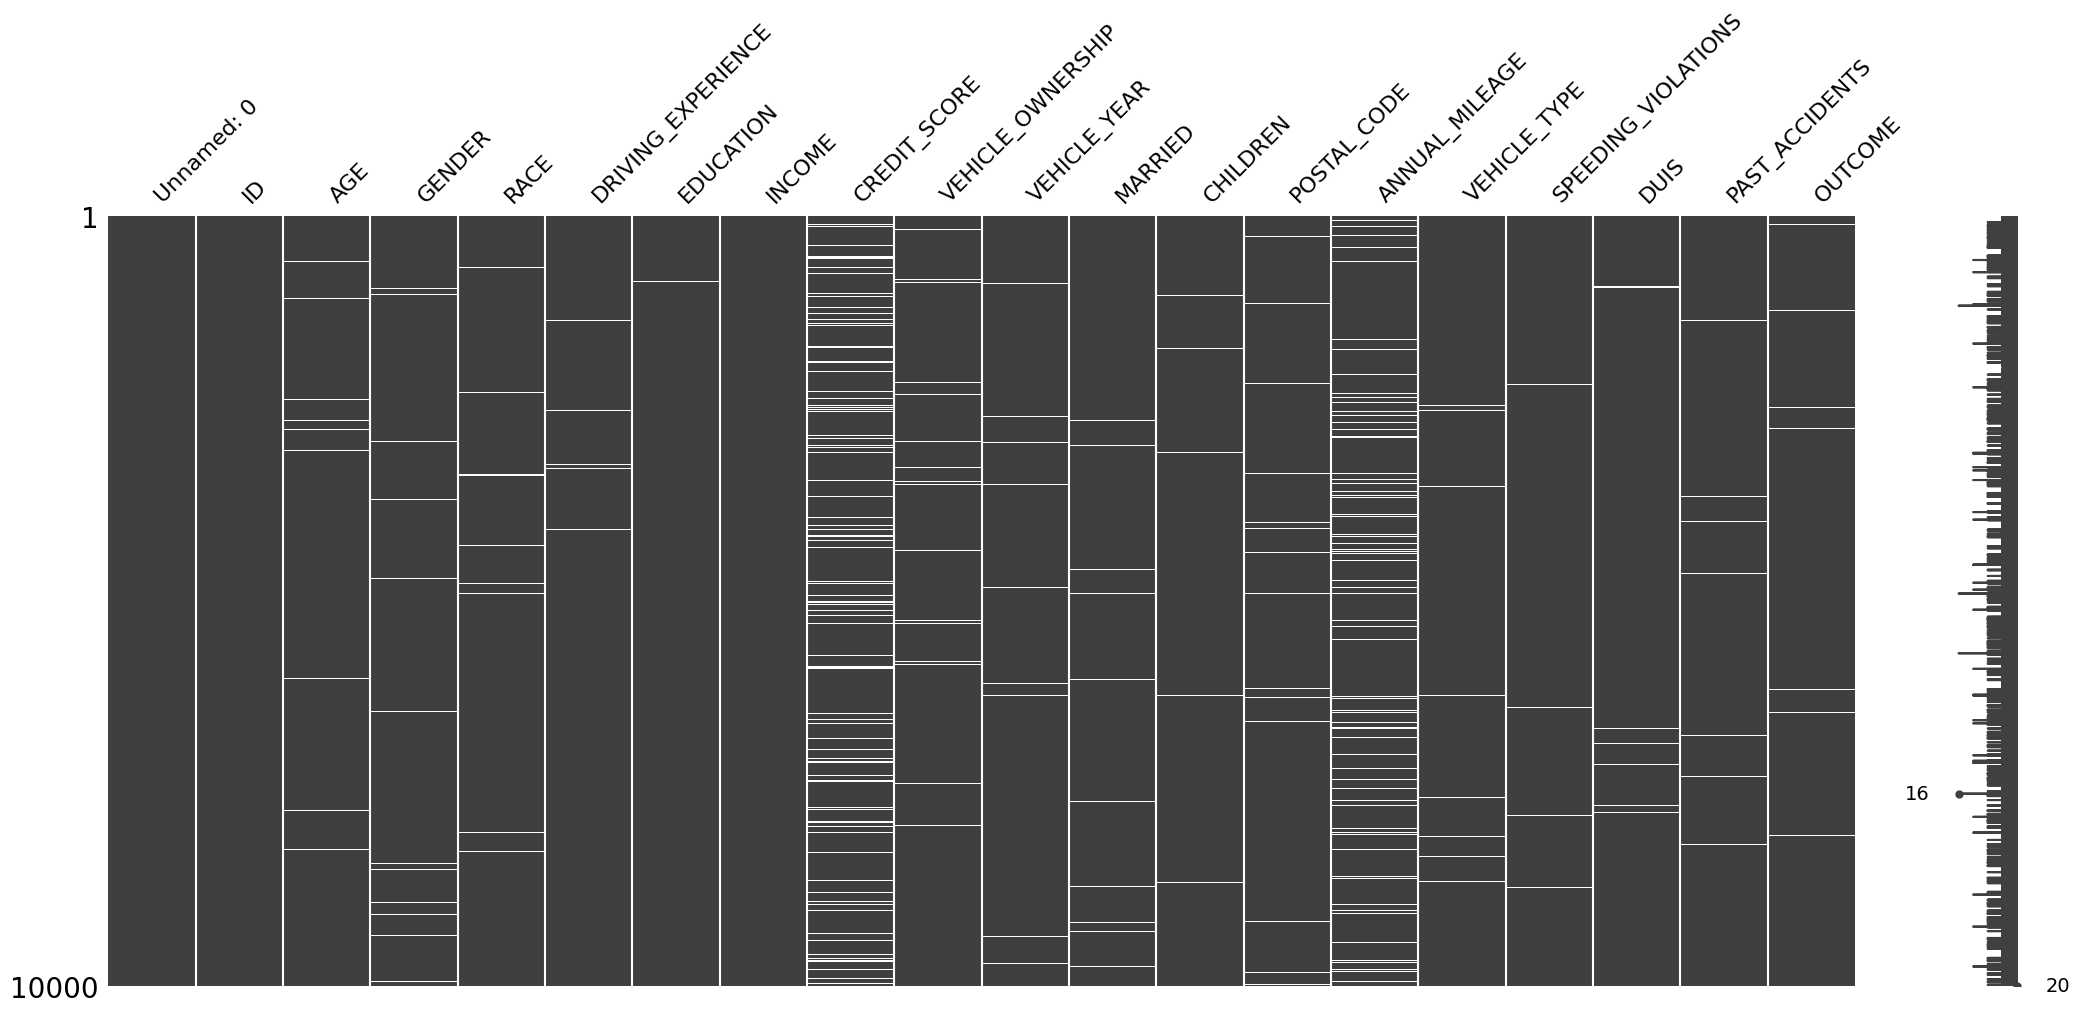

In [71]:
import missingno as msno

msno.matrix(cic);

Unfortunately, my assumption was wrong, and if I drop the rows with missing data, I’ll lose more than 10% of the dataset.

In [72]:
(cic.shape[0] - cic[cic.columns.difference(['CREDIT_SCORE', 'ANNUAL_MILEAGE'])].dropna().shape[0]) / cic.shape[0]

0.1338

Since I plan to analyze using a maximum of 3 columns at a time, I will leave the missing values for now. The only column that cannot contain `NaNs` is `OUTCOME`, because we cannot draw conclusions from data if we don’t know the outcome.

In [73]:
cic = cic[cic['OUTCOME'].notna()]
cic['OUTCOME'].isna().sum()

0

Now let’s check for duplicates.

In [74]:
cic.duplicated().sum()

0

## Descriptive Statistics

Let's check if one outcome is much more common than the other.

In [75]:
outcome0 = cic[cic['OUTCOME'] == '0.0']
outcome1 = cic[cic['OUTCOME'] == '1.0']
outcome0.shape[0], outcome1.shape[0] 

(6795, 3105)

We can see that the dataset contains roughly twice as many entries with outcome `0.0` compared to `1.0`.

*I will check the number of data points for each category in the other columns during the visualization step when I create bar charts.*

It's possible that some values appear only for one of the outcomes. Let's check whether that's the case.

In [76]:
for column in cic.select_dtypes(include='object').columns[:-1]:
    s1 = pd.Series(outcome0[column].unique())
    s2 = pd.Series(outcome1[column].unique())

    out0 = s1[~s1.isin(s2)].tolist()
    out1 = s2[~s2.isin(s1)].tolist()

    if out0 or out1:
        print(f'{column}:\nOutcome = 0 - > {out0}, Outcome = 1 - > {out1}')

POSTAL_CODE:
Outcome = 0 - > [], Outcome = 1 - > ['21217']
SPEEDING_VIOLATIONS:
Outcome = 0 - > ['13', '12', '15', '17', '19', '18', '16', '14', '22'], Outcome = 1 - > []
DUIS:
Outcome = 0 - > ['5', '6'], Outcome = 1 - > []
PAST_ACCIDENTS:
Outcome = 0 - > ['8', '10', '11', '9', '12', '14', '15'], Outcome = 1 - > []


We can see that clients with the postal code `21217` always filed a claim. On the other hand, clients with a high number of speeding violations, past accidents, or records of driving under the influence never filed a claim. This might be due to the very small number of such clients in the dataset.

In [77]:
cic['SPEEDING_VIOLATIONS'].value_counts().sort_values()


SPEEDING_VIOLATIONS
22       1
18       1
19       2
17       3
16       4
14       5
15       8
13      12
12      19
11      28
9       47
10      49
8       74
7      137
6      183
5      308
4      521
3      816
2     1135
1     1521
0     4927
Name: count, dtype: int64

In [78]:
cic['DUIS'].value_counts().sort_values()

DUIS
6       1
5       2
4      10
3      66
2     322
1    1440
0    7960
Name: count, dtype: int64

In [79]:
cic['PAST_ACCIDENTS'].value_counts().sort_values()

PAST_ACCIDENTS
14       1
15       1
12       2
11       7
10       9
9       18
8       40
7       60
6      142
5      229
4      361
3      637
2     1076
1     1741
0     5476
Name: count, dtype: int64

In [80]:
cic['POSTAL_CODE'].value_counts().sort_values()

POSTAL_CODE
21217     119
92101     474
32765    2393
10238    6815
Name: count, dtype: int64

- The groups of clients with high numbers of past accidents, DUIs, or speeding violations are very small, so I avoid making strong conclusions based on them.  
- Also, all 119 clients from the postal code `21217` filed a claim, which might indicate a local factor (but again, the group is relatively small).

Let's check the **mode** of the numeric features in our dataset.

In [81]:
cic['CREDIT_SCORE'].mode()

0       0.053358
1       0.060867
2       0.064810
3       0.095387
4       0.097211
          ...   
8834    0.884410
8835    0.896299
8836    0.914117
8837    0.915883
8838    0.960819
Name: CREDIT_SCORE, Length: 8839, dtype: float64

In [82]:
cic['CREDIT_SCORE'].mode().shape[0] == cic[cic['CREDIT_SCORE'].notna()].shape[0]

True

As we can see, all `CREDIT_SCORE` values are unique, so I rounded this column.

In [83]:
cic['CREDIT_SCORE'].apply(lambda x: round(x, 2)).mode()

0    0.58
Name: CREDIT_SCORE, dtype: float64

In [84]:
cic['ANNUAL_MILEAGE'].mode()

0    11000.0
Name: ANNUAL_MILEAGE, dtype: float64

These modes suggest that the typical client in this dataset has a moderate credit score and drives approximately an average annual mileage.

*Statistical metrics such as `mean`, `count`, `standard deviation`, `minimum`, `maximum`, and `median` for these columns have already been reviewed in the `Data Cleaning` section.*

A deeper look into the **distribution** of numeric columns.

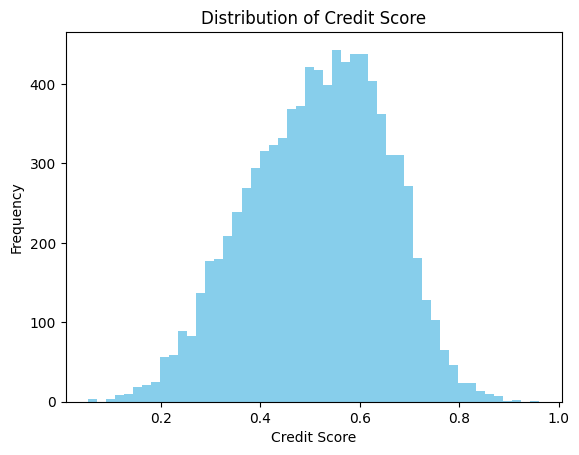

In [85]:
import matplotlib.pyplot as plt
plt.hist(cic['CREDIT_SCORE'], color = 'skyblue', bins=50)
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency');

In [86]:
# Let's check how many unique values are in the ANNUAL_MILEAGE column to choose an appropriate number of bins
len(cic['ANNUAL_MILEAGE'].unique())

22

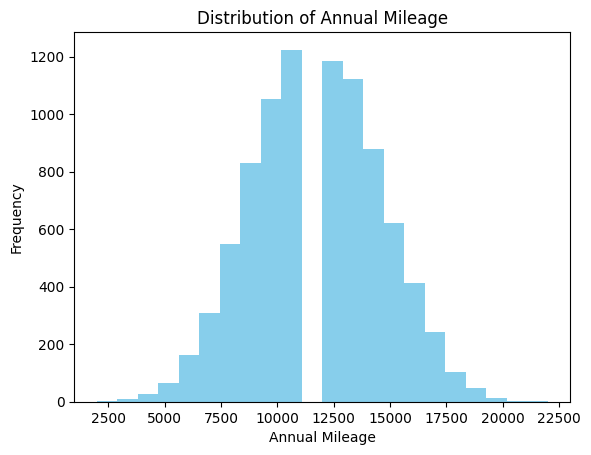

In [87]:
plt.hist(cic['ANNUAL_MILEAGE'], color = 'skyblue', bins=22)
plt.title('Distribution of Annual Mileage')
plt.xlabel('Annual Mileage')
plt.ylabel('Frequency');

Numerical features appear to follow a roughly normal distribution, as seen in the histograms.

Now, let's build box plots for these columns to better understand their distributions and detect potential **outliers**.

In [88]:
import plotly.express as px
fig = px.box(cic['CREDIT_SCORE'], y="CREDIT_SCORE", title="Box Plot of Credit Score")
fig.update_layout(yaxis_title='Credit Score')
fig.show()

In [89]:
fig = px.box(cic['ANNUAL_MILEAGE'], y="ANNUAL_MILEAGE", title="Box Plot of Annual Mileage")
fig.update_layout(yaxis_title='Annual Mileage')
fig.show()

The distributions of both features are relatively compact, with no extreme outliers that would require immediate removal.

Let's examine the **correlation** between `CREDIT_SCORE` and `ANNUAL_MILEAGE` to see if there's any relationship between them.

In [90]:
round(cic[['CREDIT_SCORE', 'ANNUAL_MILEAGE']].corr().iloc[0,1],2)

-0.18

A correlation of `-0.18` suggests a weak inverse relationship.

## Data Visualization

### Box Plots of numeric columns by OUTCOME

Let's continue exploring the numeric columns and check whether these features differ between clients with different outcomes.

In [91]:
fig = px.box(cic, x='OUTCOME', y='CREDIT_SCORE', title="Box Plot of Credit Score by Outcome")
fig.show()

This suggests that clients with higher credit scores are more likely not to file a claim.

Probably this is related to income, since wealthier people usually have better credit scores.

In [92]:
fig1 = px.box(cic, x='INCOME', y='CREDIT_SCORE', title="Box Plot of CREDIT_SCORE by INCOME")
fig2 = px.box(cic, x='INCOME', y='CREDIT_SCORE', color='OUTCOME', title="Box Plot of CREDIT_SCORE by INCOME with OUTCOME")
fig1.show()
fig2.show()

- We can see that people with higher income do have higher credit scores, so it seems this is not an independent feature.
- Within each income group, there is almost no difference in credit scores between those who filed a claim and those who didn’t: the medians are nearly the same. The only difference is that the distribution for those who filed a claim is slightly narrower, though there are still some outliers.
- Possibly, we could pay attention to clients whose credit score is much lower or higher than the group median.

In [93]:
fig = px.box(cic, x='OUTCOME', y='ANNUAL_MILEAGE', title="Box Plot of Annual Mileage by Outcome")
fig.show()

This could indicate that clients who drive moderately more tend to file claims more frequently, but extremely high mileage does not necessarily correlate with claims.

### Number of clients by categorical column and OUTCOME

Now let's explore the categorical features by checking both the number of clients in each category and how many of them filed a claim.

In [94]:
def plot_bars(column, num = False):

    gcic = cic.groupby([column, 'OUTCOME']).size().reset_index(name='Number of Clients')

    if num:
        gcic[column] = pd.to_numeric(gcic[column], errors='coerce')

    total_per_group = gcic.groupby(column)['Number of Clients'].transform('sum')
    gcic['percent'] = (gcic['Number of Clients'] / total_per_group * 100).round(1)
    gcic['label_text'] = gcic.apply(
    lambda row: f"{int(row['Number of Clients'])} Clients\n{row['percent']}%", axis=1
    )

    fig=px.bar(gcic, x=column, y='Number of Clients', color='OUTCOME',text='label_text', 
               category_orders={"OUTCOME": ["1.0", "0.0"]}, title=f"Number of Clients by {column} and OUTCOME")
    fig.show()

In [95]:
cic.select_dtypes(include='object').columns

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

In [96]:
plot_bars('AGE')

- The older the clients, the smaller the percentage of those who file a claim.
- Specifically, clients aged 16-25 mostly file claims, while those aged 26 and above mostly do not.
- The largest number of clients belongs to the 26-39 age group.

In [97]:
plot_bars('GENDER')

- The number of male and female clients is almost equal.
- Men file claims about 10% more often than women.

In [98]:
plot_bars('RACE')

- The majority group has significantly more clients.
- However, both majority and minority groups file claims only about 31-32% of the time.
- It seems that race does not have a major influence on whether a client files a claim.

In [99]:
plot_bars('DRIVING_EXPERIENCE')

- Clients with less driving experience (0–9 years) tend to file claims more often.
- The more experience clients have, the less likely they are to file a claim.
- The total number of clients also decreases as driving experience increases (which makes sense as many people might have started driving later in life and therefore have fewer years of experience).

In [100]:
plot_bars('EDUCATION')

- Most clients have a `high school` or `university` education. However, their claim rates are relatively low.
- Clients with no educationn are fewer, but they file claims much more frequently
- This might suggest that lower education levels are associated with higher claim rates (further analysis is needed to determine if other factors are influencing this trend).


In [101]:
plot_bars('INCOME')

- The `upper class` group has nearly twice as many clients as any other income group.
- The remaining groups have similar numbers of clients, with no significant differences between them.
- However, the `upper class` has the **lowest claim rate**, both in percentage and in absolute number of claims.
- As income level decreases, the percentage of clients filing claims **increases**.
- Still, only the `poverty` group has a claim rate above 50%.
- This pattern may correlate with `AGE`, as younger clients are likely to belong to lower income groups and may be more tend to file claims. Older clients may have had more time to accumulate wealth, which might explain why they file fewer claims.


In [102]:
plot_bars('VEHICLE_OWNERSHIP')

- Clients who own a vehicle make up the majority.
- However, only about 20% of vehicle owners file a claim, compared to more than 50% of clients without a vehicle.
- This may be linked to income: higher-income individuals are more likely to own a vehicle, while lower-income clients might rely on rentals or shared vehicles, which could increase the likelihood of filing a claim.

In [103]:
plot_bars('VEHICLE_YEAR')

- Vehicles from `before 2015` make up the majority, with a claim rate of around 40%.
- Newer vehicles are fewer, but have a much lower claim rate (just around 11%).
- This may be due to income differences: wealthier clients are more likely to own newer cars and are generally less likely to file a claim.
- Additionally, newer vehicles may simply experience fewer issues or breakdowns compared to older ones.

In [104]:
plot_bars('MARRIED')

- The number of married and unmarried clients is almost equal.
- However, only about 19% of married clients file a claim, compared to around 44% of unmarried clients.
- This may be related to age: older people are more likely to be married, and as we saw earlier, they tend to file fewer claims.

In [105]:
plot_bars('CHILDREN')

- Clients without children are twice as likely to file claims compared to those with children.
- This may be linked to age: older people are more likely to have children, and they also tend to file fewer claims.

In [106]:
plot_bars('POSTAL_CODE')

- Most clients are from `10238`, but they file claims the least often.
- Clients from `32765` and `92101` file claims more often (around 40%), though there are fewer of them.
- The fewest clients are from `21217`, and all of them filed claims.
- This pattern may relate to income: wealthier areas have more clients but fewer claims.

In [107]:
plot_bars('VEHICLE_TYPE')

- Both sedan and sports car owners file claims at a similar rate (around 32%).
- This suggests that vehicle type is not a strong indicator of whether a client will file a claim.

In [108]:
plot_bars('SPEEDING_VIOLATIONS', True)
plot_bars('DUIS', True)
plot_bars('PAST_ACCIDENTS', True)

- Clients with no violations file claims more often (36-49%).
- Even one incident leads to a clear drop in claim rates.
- Although fewer clients have such history, there are still over 1000 with at least one incident in any of these categories, so these features should not be ignored.

### Heatmap analysis of feature interactions

In this block, I want to check the assumptions I made in the previous one, such as the relationships between education and income, or age and marital status.

In [109]:
import seaborn as sns

def plot_heatmap(column1, column2, f = 'size', df = None):

    if df is None:
        cic2 = cic.copy()
    else:
        cic2 = df.copy()

    if f == 'size':
        point = ".0f"
        cname = f'Client Distribution across {column1} and {column2}'
    # We use 'mean' to find out the percentage of claims more easily:
    # When calculating the mean, we sum all values
    # If we convert OUTCOME to float, summing the values gives us the total number of claims
    # Then, dividing by the total number of clients gives us the claim rate
    elif f == 'mean': 
        point = ".2f"
        cname = f'Claim Rate by {column1} and {column2}'

    heat_data  = pd.crosstab(cic2[column1], cic2[column2], values=cic2['OUTCOME'].astype(float), aggfunc=f)
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(heat_data, annot=True, cmap='coolwarm', fmt=point)
    plt.title(cname)
    plt.show()

Previously, we observed that clients with a university or high school education had lower claim rates compared to those without any education.<br>
One possible explanation is that many clients without education might be young people who simply haven't had the chance to finish school yet (possibly under 18).<br>
As we've seen, younger people tend to submit more claims.<br>
Let's now check whether people without education and young people are, in fact, the same group - in other words, whether we should focus more on age than on education.

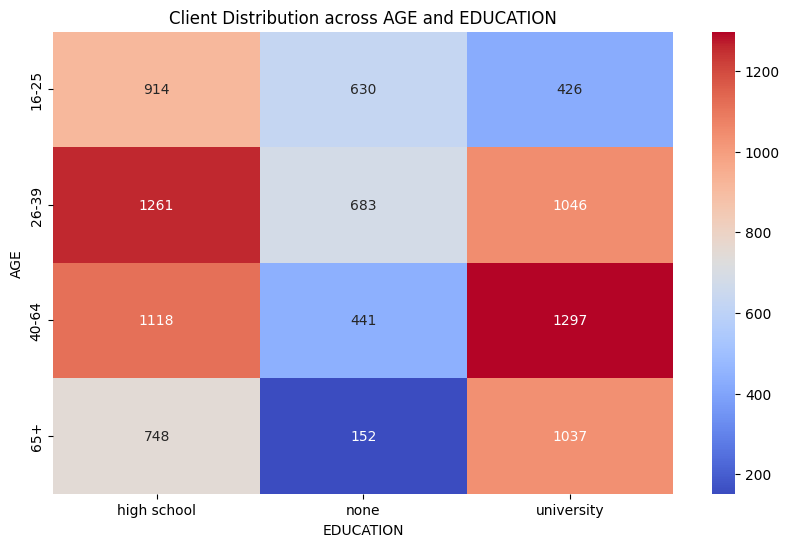

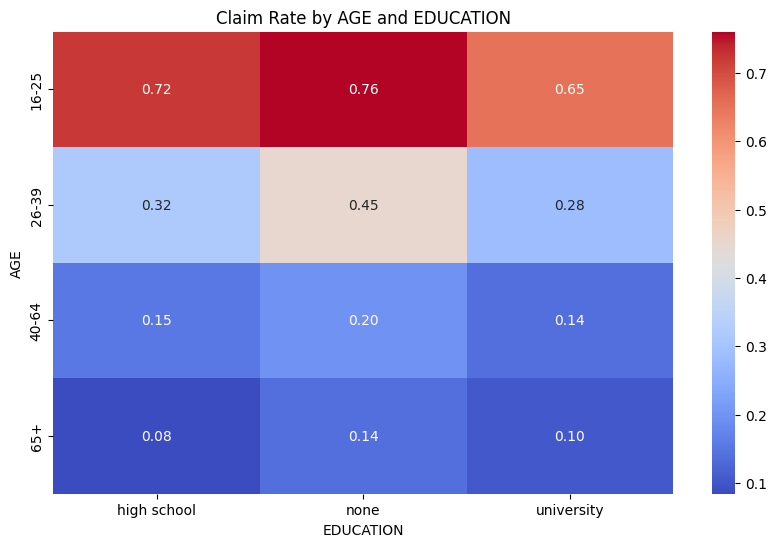

In [110]:
col1 = 'AGE'
col2 = 'EDUCATION'

plot_heatmap(col1, col2)
plot_heatmap(col1, col2, f='mean')

- As we can see, the assumption is not correct - young people are more common across other education levels.
- However, young clients without education do have the highest claim rate.
- Overall, age seems to have a much stronger impact on claim probability than education.
- That said, having a high school or university degree does appear to slightly reduce the likelihood of submitting a claim.

One more theory I had about education is that richer people are more likely to have a better education. That’s why it may look like better education leads to fewer claims, when actually income might be the real reason.

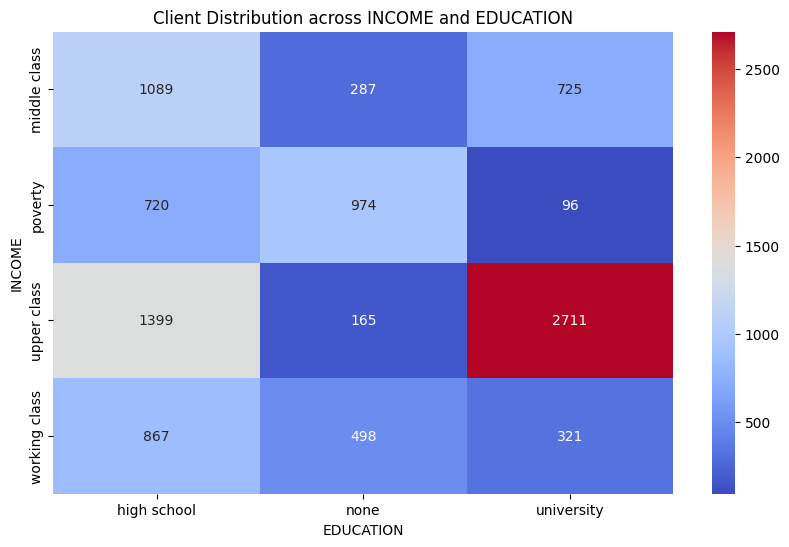

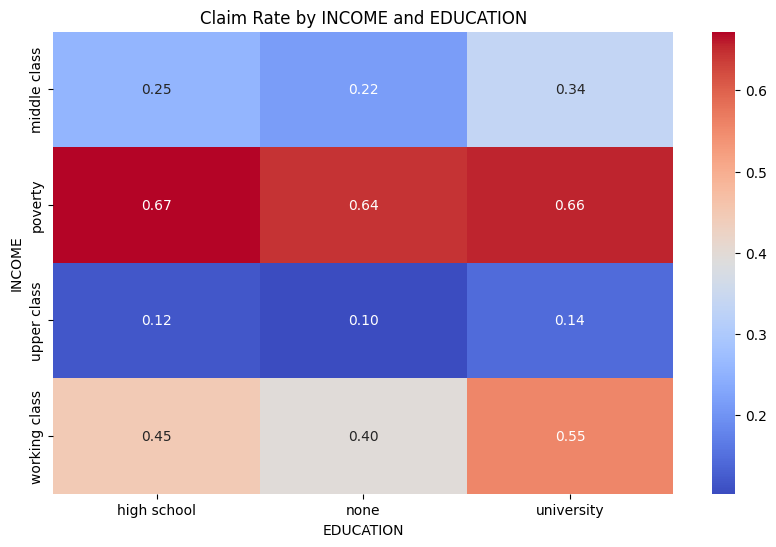

In [111]:
col1 = 'INCOME'
col2 = 'EDUCATION'

plot_heatmap(col1, col2)
plot_heatmap(col1, col2, f='mean')

- We can see that `university` education is mostly linked with the `upper class`, which is the largest group in our data and also the least likely to make claims.
- But we also see that clients with no education have a slightly lower claim rate compared to some others, so it seems like `EDUCATION` might not be a reliable feature in this case.

As we saw before, both age and income are related to lower claim rates: the older and richer the clients are, the fewer claims they make. <br>
I assume that income might be the more important factor, and that older people just seem to make fewer claims because they usually earn more - they’ve had more time to build their careers.

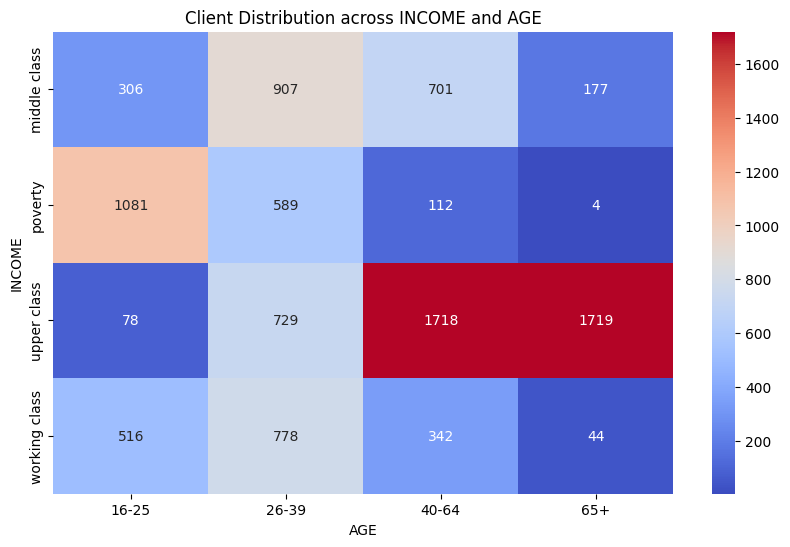

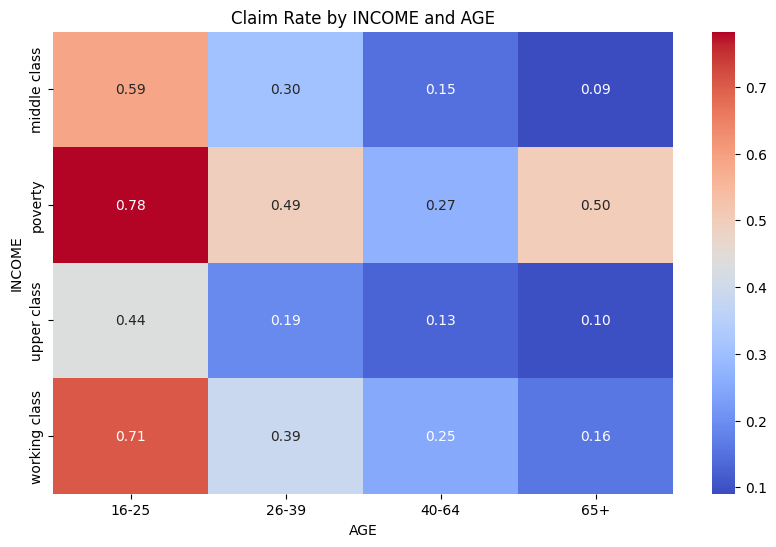

In [112]:
col1 = 'INCOME'
col2 = 'AGE'

plot_heatmap(col1, col2)
plot_heatmap(col1, col2, f='mean')

- My guess about the distribution was correct: upper-class clients are mostly older, while lower-class clients are mostly between 16–25.
- Working-class clients are more often younger, while middle-class clients tend to be older.
- Even though the claim rate still goes down as income increases, the relationship with age is even stronger.
- No matter the income level, the youngest clients make the most claims, and the older they are, the less likely they are to make one.
- So age looks like an even more important feature than income, although income is still a meaningful factor.

We saw earlier that clients who own a car tend to make fewer claims.<br>
I assumed this could be because of income: richer people, who are less likely to make a claim, are also more likely to own a car.<br>
So maybe the real reason for fewer claims isn't the car itself, but the higher income.<br>
That would mean car ownership might not be as important as it first seemed.<br>

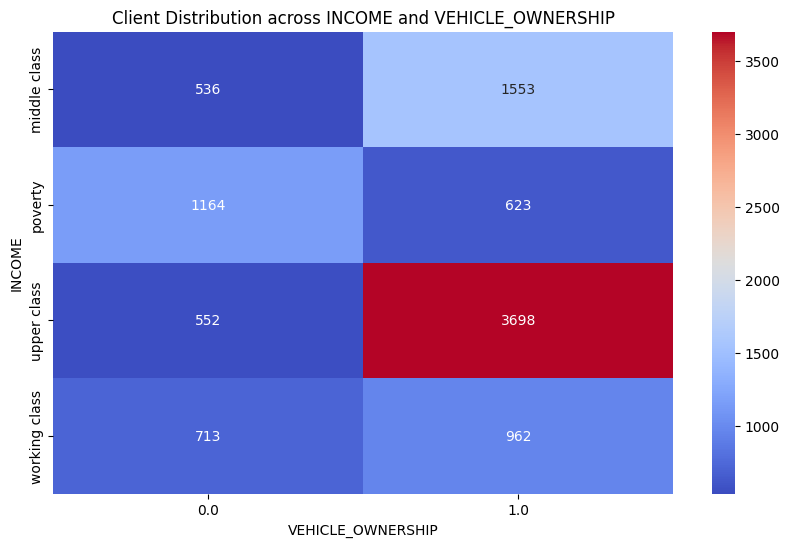

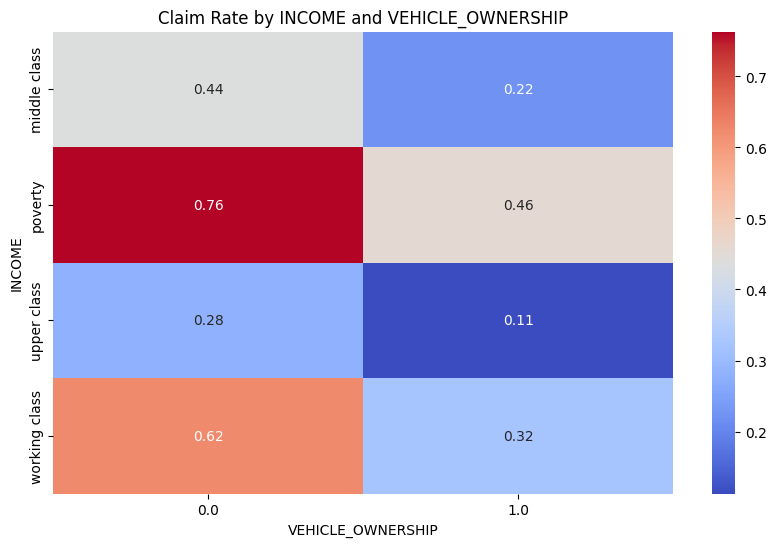

In [113]:
col1 = 'INCOME'
col2 = 'VEHICLE_OWNERSHIP'

plot_heatmap(col1, col2)
plot_heatmap(col1, col2, f='mean')

- My assumption turned out to be mostly correct: the largest group of clients are upper-class people who own a car and don’t make claims.
- On the other hand, among those who don’t own a car, the biggest group are low-income clients, who have the highest claim rate.
- However, even within each income group, we still see that people with a car make almost half as many claims as those without a car.
- So, car ownership still looks like a meaningful feature.

We previously noticed that the claim rate for people with cars made after 2015 is much lower than for those with older cars. I assume this is because most new cars are owned by wealthier clients, who tend to make fewer claims, which may explain the result.

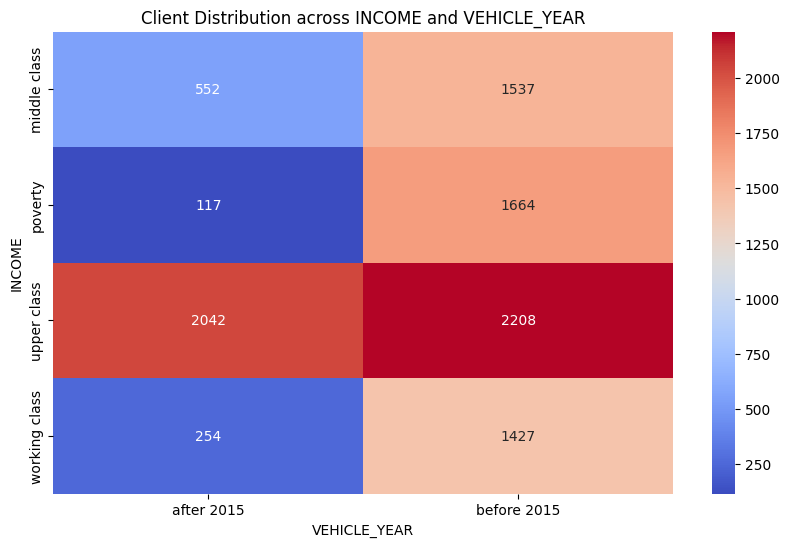

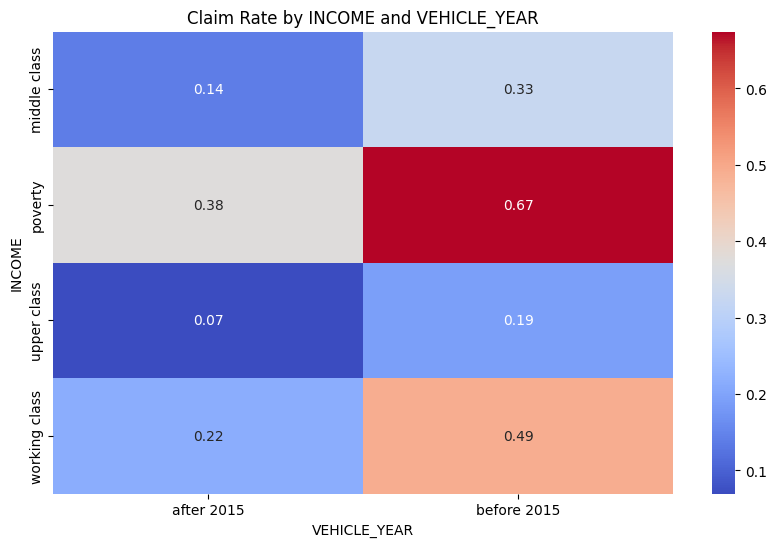

In [114]:
col1 = 'INCOME'
col2 = 'VEHICLE_YEAR'

plot_heatmap(col1, col2)
plot_heatmap(col1, col2, f='mean')

- My assumption was correct: most new cars are owned by higher-class clients who rarely make claims.
- However, even within each class, the claim rate for owners of newer cars is about half the rate for those with older ones, so car age is still an important factor.

Earlier we saw that the claim rate decreases as driving experience increases. This is obviously related to age, but now I want to check whether the same trend is seen within specific age groups.

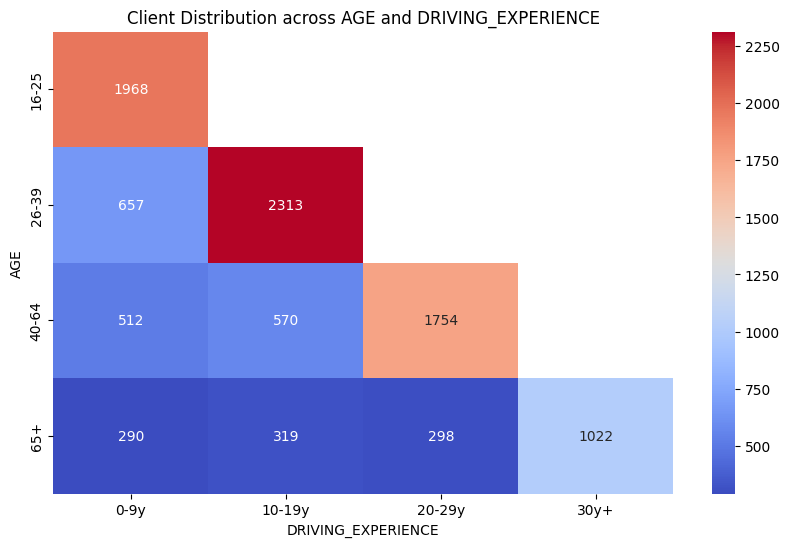

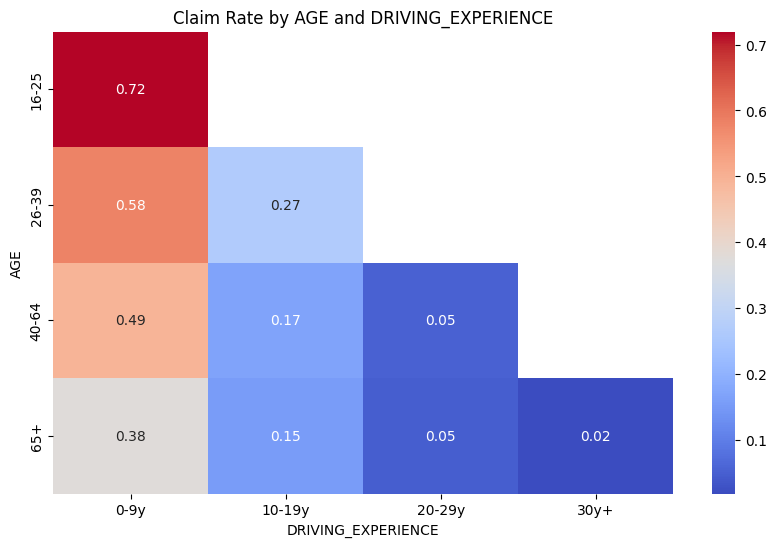

In [115]:
col1 = 'AGE'
col2 = 'DRIVING_EXPERIENCE'

plot_heatmap(col1, col2)
plot_heatmap(col1, col2, f='mean')

- The trend that older people make fewer claims still holds.
- However, having more than 10 years of driving experience significantly reduces the claim rate regardless of age, so it’s a very important factor.

Earlier we noticed that clients with certain postal codes tend to make fewer claims, while others tend to make more. My hypothesis was that wealthier people live in some areas and poorer people in others, which might explain the difference in claim rates.

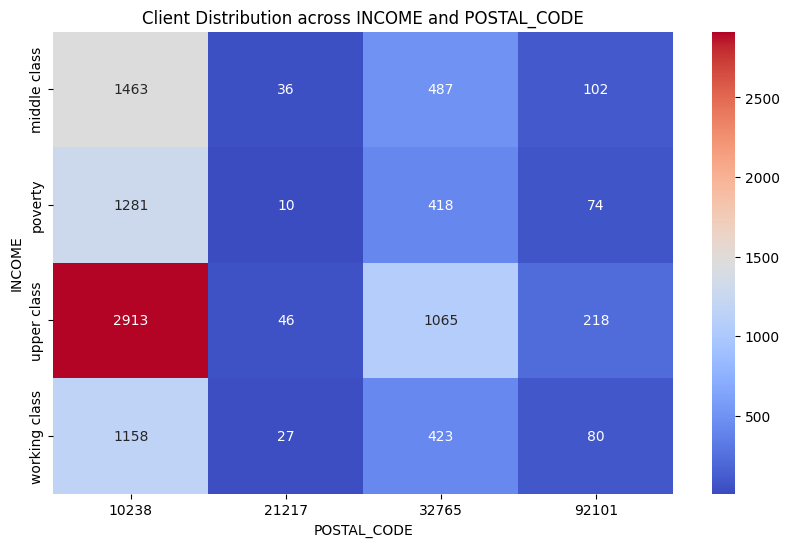

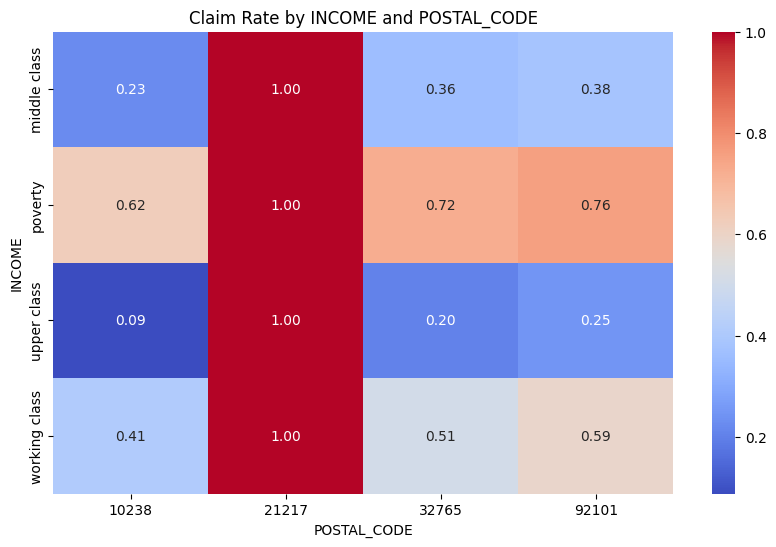

In [116]:
col1 = 'INCOME'
col2 = 'POSTAL_CODE'

plot_heatmap(col1, col2)
plot_heatmap(col1, col2, f='mean')

- We can see that the higher class makes up the largest share of clients across all postal codes.
- There are very few clients with postal code 21217, so we won’t focus on it (especially since all of them made claims).
- Still, the claim pattern we saw earlier in the bar chart remains, regardless of client class.
- So, postal code (location) seems to be a relevant factor to consider.

I had a hypothesis that the lower claim rate among married people and those with children might be related to age.

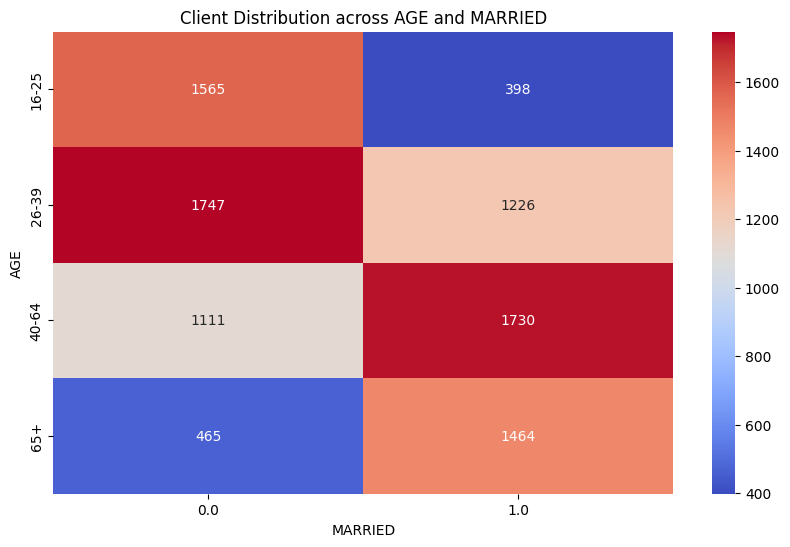

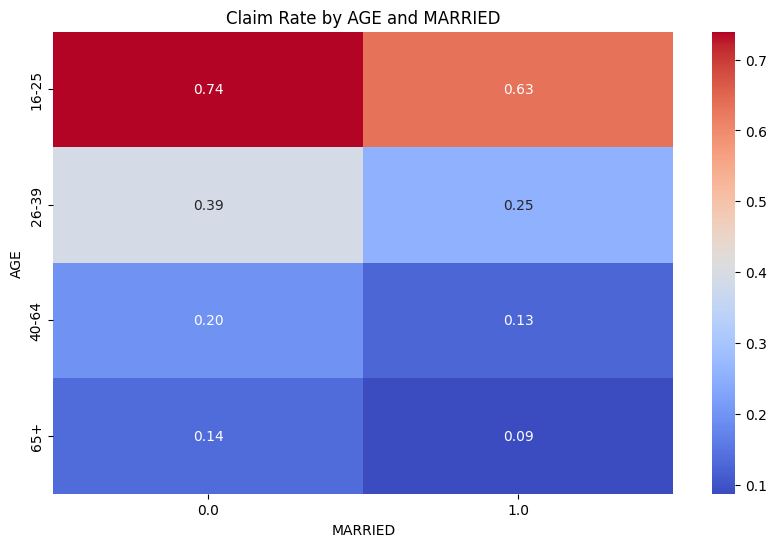

In [117]:
col1 = 'AGE'
col2 = 'MARRIED'

plot_heatmap(col1, col2)
plot_heatmap(col1, col2, f='mean')

- Younger clients are indeed less likely to be married than older ones.
- However, regardless of age, married clients tend to make fewer claims.

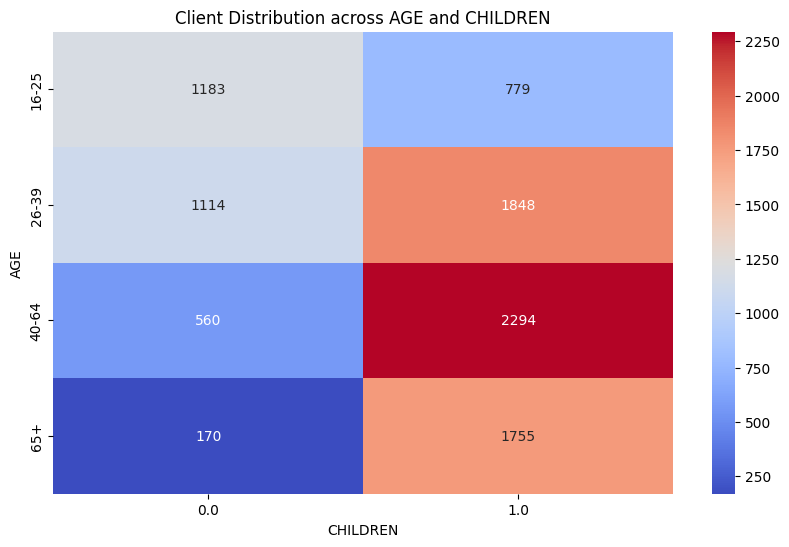

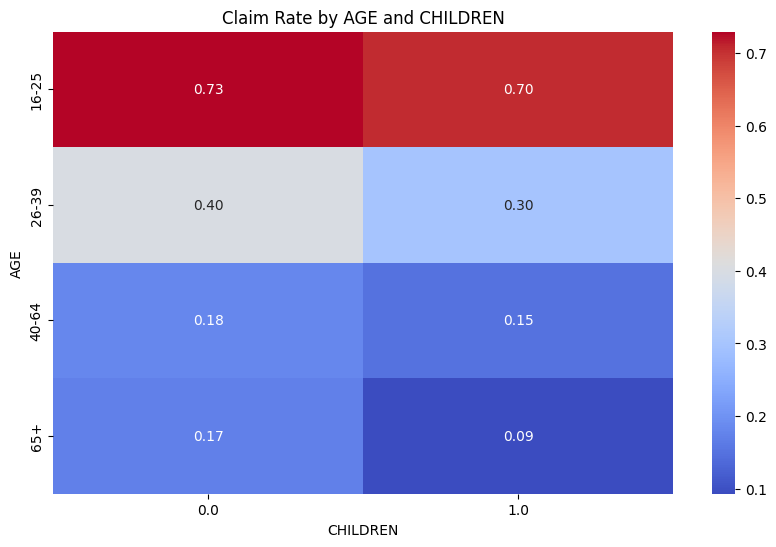

In [118]:
col1 = 'AGE'
col2 = 'CHILDREN'

plot_heatmap(col1, col2)
plot_heatmap(col1, col2, f='mean')

- Older clients are more common among those who have children.
- While clients with children make slightly fewer claims regardless of age, the difference is not very significant.

## Conclusions

Based on the analysis, I can conclude that the following features are indicators of a **high probability that a customer will *not* file a claim**. Therefore, these groups of customers may require additional attention and engagement to ensure proper communication and service:

- `AGE`: the older the person, the less likely they are to file a claim
- `GENDER`: women tend to file claims slightly less often than men
- `DRIVING_EXPERIENCE`: more experienced drivers are less likely to file claims
- `INCOME`: people with higher income are less likely to file claims
- `CREDIT_SCORE`: depends on income, but it's worth noting clients whose score is far from the median within their income group
- `VEHICLE_OWNERSHIP`: vehicle owners tend to file claims less often
- `VEHICLE_YEAR`: customers with newer cars file claims less frequently
- `MARRIED`: married clients are less likely to file a claim
- `CHILDREN`: clients with children also show a lower tendency to file claims, so they deserve extra attention
- `POSTAL_CODE`: the area where a customer lives matters — if their neighborhood has a low claim rate, the customer is also less likely to file a claim
- `ANNUAL_MILEAGE`: clients with either very low or very high mileage tend to file claims less often
- `SPEEDING_VIOLATIONS`, `DUIS`, `PAST_ACCIDENTS`: having one or more of these incidents is associated with a lower likelihood of filing a claim